<a href="https://colab.research.google.com/github/BallFord/Iqbal-Miftahul-Fikri_2411531004_ML2526/blob/main/Praktikum%201%20Machine%20Learning/Latihan4_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latihan 4**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [2]:
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseValue'] = pd.Series(housing.target)

targets = df['MedHouseValue']
inputs = df.drop(['MedHouseValue'], axis=1)
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [3]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Sebagian data X_test setelah di-scale:")
print(X_test[:5])

Sebagian data X_test setelah di-scale:
[[8.14678418e-02 4.70588235e-01 2.34243862e-02 2.72279953e-02
  3.89304633e-02 2.56319369e-03 3.73404255e-01 5.31872510e-01]
 [1.40094619e-01 5.68627451e-01 2.94319155e-02 3.39943401e-02
  4.37792539e-02 1.59940545e-03 2.75531915e-01 4.87051793e-01]
 [2.05528200e-01 1.00000000e+00 2.18994569e-02 3.36933609e-02
  3.66321926e-02 5.37584539e-04 5.58510638e-01 1.90239044e-01]
 [3.61215707e-01 3.13725490e-01 3.74041974e-02 2.71457086e-02
  4.77031307e-02 2.21474802e-03 1.84042553e-01 5.60756972e-01]
 [2.22417622e-01 6.47058824e-01 3.26485262e-02 2.74553696e-02
  2.97093528e-02 1.44155644e-03 4.32978723e-01 2.41035857e-01]]


In [4]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Nilai Intercept:", lr_model.intercept_)
print("Nilai Slope (Koefisien masing-masing fitur):")
for feature, coef in zip(inputs.columns, lr_model.coef_):
    print(f"- {feature}: {coef}")

Nilai Intercept: 3.6307047193242434
Nilai Slope (Koefisien masing-masing fitur):
- MedInc: 6.464516361453105
- HouseAge: 0.4937752672816762
- AveRooms: -17.217877319205495
- AveBedrms: 19.700928184079135
- Population: -0.02767764173772522
- AveOccup: -4.187733397766777
- Latitude: -3.93424541710588
- Longitude: -4.354227278281034


Nilai MSE: 0.5305677824766751
Nilai R2: 0.5957702326061665


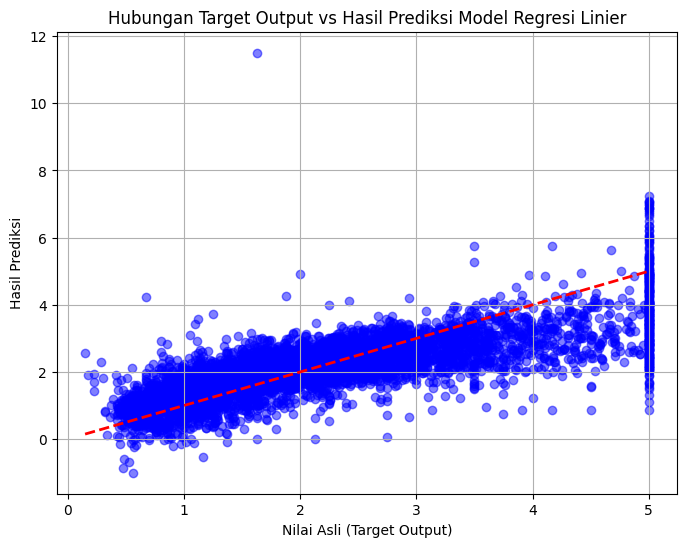

In [5]:
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Nilai MSE: {mse}")
print(f"Nilai R2: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Nilai Asli (Target Output)')
plt.ylabel('Hasil Prediksi')
plt.title('Hubungan Target Output vs Hasil Prediksi Model Regresi Linier')
plt.grid(True)
plt.show()

In [6]:
filename = 'finalized_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))

print(f"Model berhasil disimpan dengan nama file: {filename}")

Model berhasil disimpan dengan nama file: finalized_model.sav
